In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
print(df.isnull().sum()[df.isnull().sum()>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


**Since there are 177 null values in age column , we replaced null with mean age value. And add them to a new column 'Age_Filled'**

In [53]:
# Calculate the mean of 'Age' column
age_mean = df['Age'].mean()

# Create a new column 'Age_Filled' where nulls are filled with the mean
df['Age_Filled'] = df['Age'].fillna(age_mean)


In [65]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Filled Deck  
0      0         A/5 21171   7.2500   NaN        S        22.0    U  
1      0          PC 17599  71.2833   C85        C        38.0    C  
2      0  STON/O2. 3101282   7.9250   NaN        S        26.0    U  
3      0            113803  53.1000  C12

**Since there are only 2 nulls for the embarked column ,we dropped that 2 rows with nulls**

In [60]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Filled  
0      0         A/5 21171   7.2500   NaN        S        22.0  
1      0          PC 17599  71.2833   C85        C        38.0  
2      0  STON/O2. 3101282   7.9250   NaN        S        26.0  
3      0            113803  53.1000  C123        S        35

**Histogram of Age before handeling the Null values**

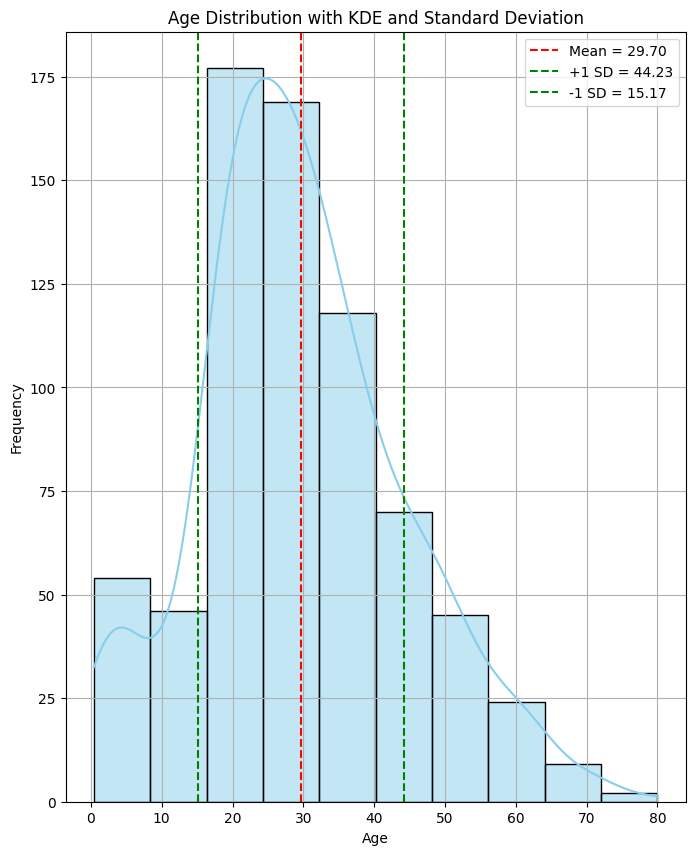

In [20]:
# Calculate mean and standard deviation
mean = df['Age'].mean()
std = df['Age'].std()

# Plot
plt.figure(figsize=(8,10))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add lines for mean and ±1 standard deviation
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(mean + std, color='green', linestyle='--', label=f'+1 SD = {mean + std:.2f}')
plt.axvline(mean - std, color='green', linestyle='--', label=f'-1 SD = {mean - std:.2f}')

plt.title('Age Distribution with KDE and Standard Deviation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Histogram of Age After handeling the Null values

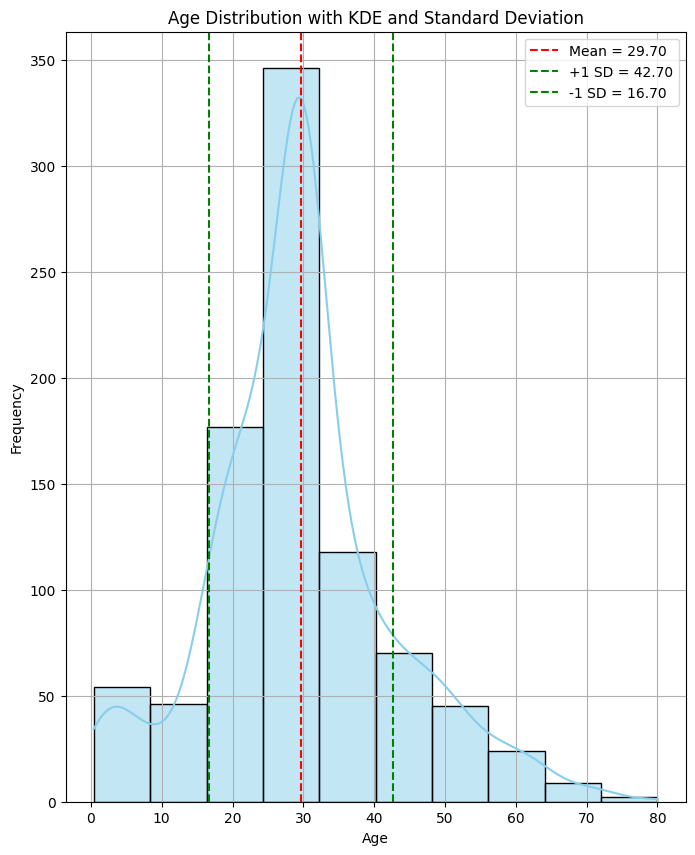

In [21]:
# Calculate mean and standard deviation
mean = df['Age_Filled'].mean()
std = df['Age_Filled'].std()

# Plot
plt.figure(figsize=(8,10))
sns.histplot(df['Age_Filled'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Add lines for mean and ±1 standard deviation
plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(mean + std, color='green', linestyle='--', label=f'+1 SD = {mean + std:.2f}')
plt.axvline(mean - std, color='green', linestyle='--', label=f'-1 SD = {mean - std:.2f}')

plt.title('Age Distribution with KDE and Standard Deviation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

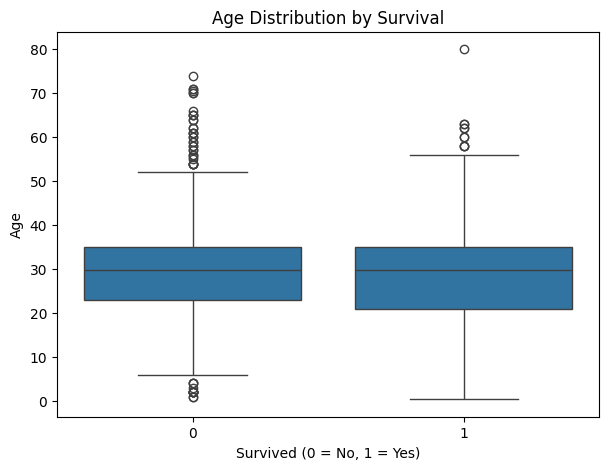

In [55]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Survived', y='Age_Filled', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


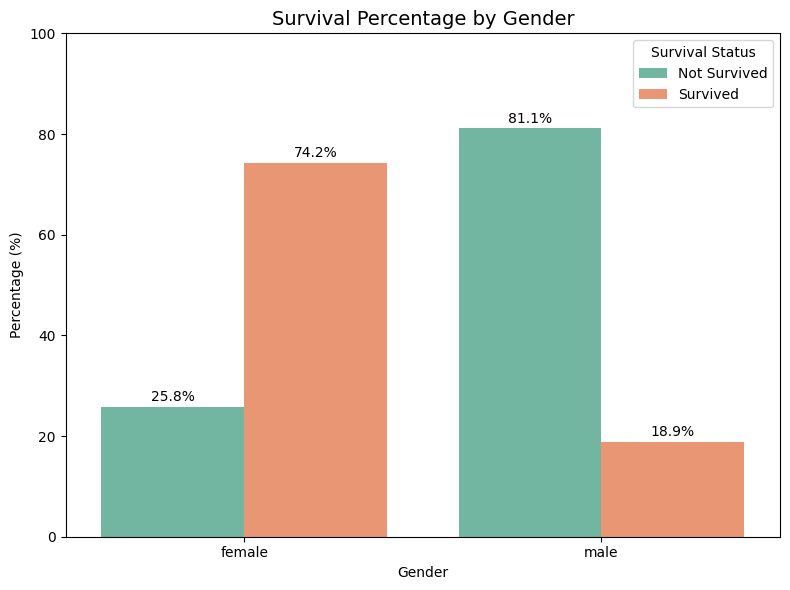

In [56]:
# Calculate counts first
count_data = pd.crosstab(df['Sex'], df['Survived'])

# Convert to percentages (row-wise)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Reset index for plotting
percent_data = percent_data.reset_index()
percent_data.columns = ['Sex', 'Not Survived', 'Survived']

# Melt the data for seaborn
plot_data = percent_data.melt(id_vars='Sex',
                              value_vars=['Not Survived', 'Survived'],
                              var_name='Survival Status',
                              value_name='Percentage')
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Percentage', hue='Survival Status', data=plot_data, palette='Set2')

plt.title('Survival Percentage by Gender', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.legend(title='Survival Status')

# Optional: Add percentage labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.tight_layout()
plt.show()


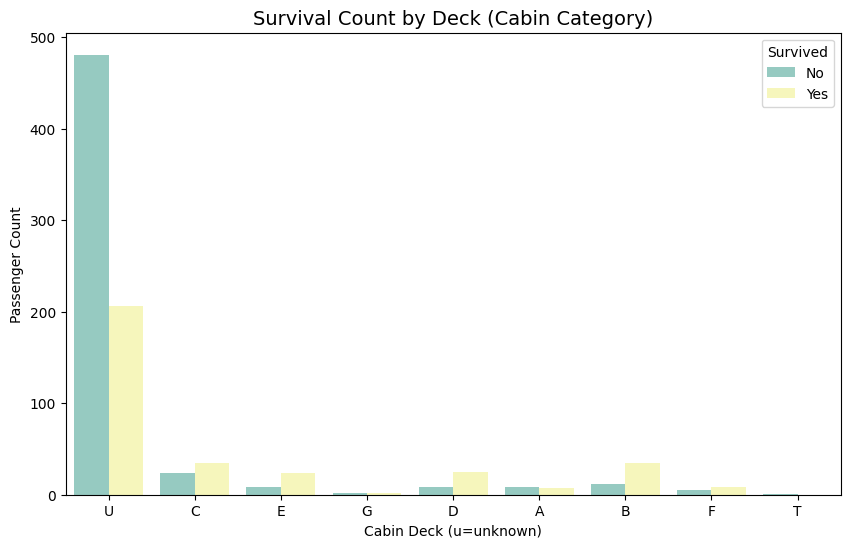

In [63]:
# Extract first letter from Cabin (deck letter)
df['Deck'] = df['Cabin'].str[0]

# Fill NaNs with 'U' (Unknown)
df['Deck'] = df['Deck'].fillna('U')

plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Survived', data=df, palette='Set3')

plt.title('Survival Count by Deck (Cabin Category)', fontsize=14)
plt.xlabel('Cabin Deck (u=unknown)')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



In [66]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Age_Filled Deck  
0      0         A/5 21171   7.2500   NaN        S        22.0    U  
1      0          PC 17599  71.2833   C85        C        38.0    C  
2      0  STON/O2. 3101282   7.9250   NaN        S        26.0    U  
3      0            113803  53.1000  C12

In [69]:
# Step 1: Calculate the mean age (excluding nulls)
mean_age = df['Age'].mean()

# Step 2: Fill null values in the 'Age' column with the mean
df['Age'] = df['Age'].fillna(mean_age)


In [71]:
# Replace NaNs in 'Cabin' column with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')
df = df.dropna(subset=['Embarked'])


In [72]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_Filled     0
Deck           0
dtype: int64
